In [1]:
#!rm -rf /content/GTSRB


In [2]:
# Upload the dataset from it's source to Collab
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip

--2023-04-05 16:00:58--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276294756 (263M) [application/zip]
Saving to: ‘GTSRB_Final_Training_Images.zip’

GTSRB_Final_Trainin 100%[===================>] 263.50M  24.4MB/s    in 12s     

2023-04-05 16:01:10 (22.7 MB/s) - ‘GTSRB_Final_Training_Images.zip’ saved [276294756/276294756]



In [3]:
# unzip the dataset 
!unzip GTSRB_Final_Training_Images.zip

Streaming output truncated to the last 5000 lines.
  inflating: GTSRB/Final_Training/Images/00035/00000_00019.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00020.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00021.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00022.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00023.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00024.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00025.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00026.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00027.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00028.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00029.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00001_00000.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00001_00001.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00001_00002.ppm  
  inflating: GTSRB/Final_Training/Image

In [4]:
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip

--2023-04-05 16:01:27--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88978620 (85M) [application/zip]
Saving to: ‘GTSRB_Final_Test_Images.zip’

GTSRB_Final_Test_Im 100%[===================>]  84.86M  19.9MB/s    in 4.3s    

2023-04-05 16:01:31 (19.9 MB/s) - ‘GTSRB_Final_Test_Images.zip’ saved [88978620/88978620]



In [5]:
!unzip GTSRB_Final_Test_Images.zip

Streaming output truncated to the last 5000 lines.
  inflating: GTSRB/Final_Test/Images/07632.ppm  
  inflating: GTSRB/Final_Test/Images/07633.ppm  
  inflating: GTSRB/Final_Test/Images/07634.ppm  
  inflating: GTSRB/Final_Test/Images/07635.ppm  
  inflating: GTSRB/Final_Test/Images/07636.ppm  
  inflating: GTSRB/Final_Test/Images/07637.ppm  
  inflating: GTSRB/Final_Test/Images/07638.ppm  
  inflating: GTSRB/Final_Test/Images/07639.ppm  
  inflating: GTSRB/Final_Test/Images/07640.ppm  
  inflating: GTSRB/Final_Test/Images/07641.ppm  
  inflating: GTSRB/Final_Test/Images/07642.ppm  
  inflating: GTSRB/Final_Test/Images/07643.ppm  
  inflating: GTSRB/Final_Test/Images/07644.ppm  
  inflating: GTSRB/Final_Test/Images/07645.ppm  
  inflating: GTSRB/Final_Test/Images/07646.ppm  
  inflating: GTSRB/Final_Test/Images/07647.ppm  
  inflating: GTSRB/Final_Test/Images/07648.ppm  
  inflating: GTSRB/Final_Test/Images/07649.ppm  
  inflating: GTSRB/Final_Test/Images/07650.ppm  
  inflating: GTSRB

In [6]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import random
from skimage import transform,io,color,exposure
import tensorflow as tf
from tensorflow.keras import layers 
np.random.seed(42)

from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns


In [7]:
# Specify the dataset path in Collab.
data_path = '/content/GTSRB'
train_path = '/content/GTSRB/Final_Training/Images'
test_path = '/content/GTSRB/Final_Test/Images'

1 - Sign Class Info

In [42]:
train_folder = os.listdir(train_path)
# Dictionary which has {class_name : file in each class}
# Used to visualize the data
sign_data = {}

for f in train_folder:
  train_files = os.listdir(train_path + '/' + f)
  # Length - 1 so we dont consider the .csv file in each folder
  class_len = len(train_files) - 1
  class_name = str(f)
  sign_data.update({class_name : class_len})
  
# Convert the dict to df for further use
df_class = pd.DataFrame.from_dict(sign_data, orient = 'index', columns = ['Total Count'])
df_class = df_class.sort_index()

2 . Total number of images in Train and Test dataset

In [9]:
class_len = len(os.listdir(train_path))
train_len = df_class['Total Count'].sum()
test_len = len(os.listdir(test_path))

print(f'Total # of Sign Classfication - {class_len}.\nTrain Images - {train_len}\nTest Images - {test_len}')

Total # of Sign Classfication - 43.
Train Images - 39209
Test Images - 12631


3. Plot total number of images in each sign class

Text(0.5, 1.0, 'Sign Class Count')

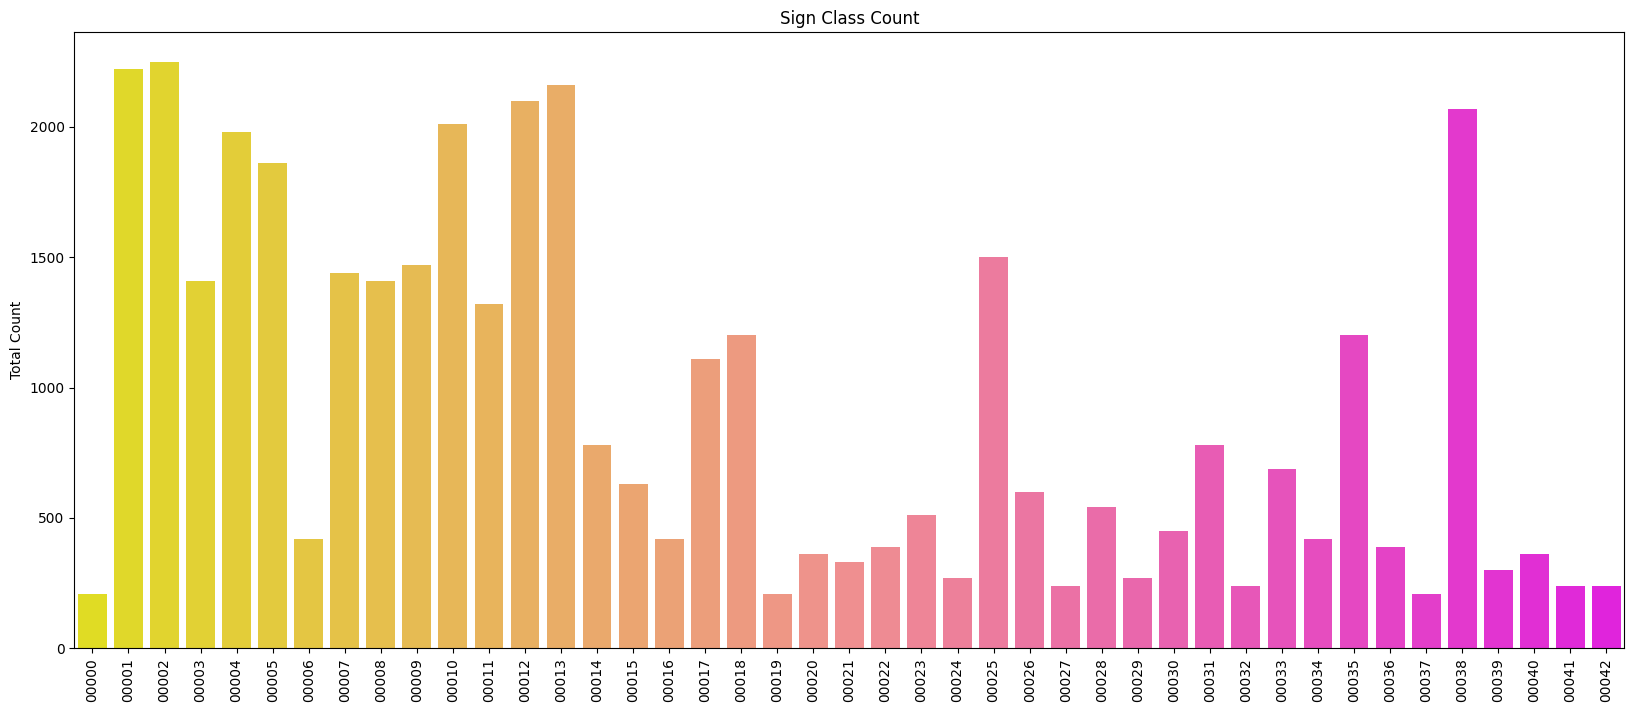

In [10]:
# Plot the class sign vs total count in each classes
fig,ax = plt.subplots(figsize=(20,8))
sns.barplot(data = df_class , x = df_class.index, y = df_class['Total Count'], ax = ax, palette = 'spring_r')
ax.tick_params(axis='x', rotation=90)
ax.set_title('Sign Class Count')

4. Read the csv file in each training class and convert it into df

In [11]:
train_csv = [ train_path +'/' + f1 + '/' + f2 for f1 in os.listdir(train_path) 
            for f2 in os.listdir(train_path + '/' + f1) if f2.endswith('.csv')]
train_csv.sort()

df_traincsv = pd.DataFrame()
for csv in train_csv:
  df_temp = pd.read_csv(csv, sep = ';')
  frames = [df_traincsv, df_temp]
  df_traincsv = pd.concat(frames)

In [12]:
print(df_traincsv.shape)
df_traincsv.head()

(39209, 8)


,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
0,00000_00000.ppm,29,30,5,6,24,25,0
1,00000_00001.ppm,30,30,5,5,25,25,0
2,00000_00002.ppm,30,30,5,5,25,25,0
3,00000_00003.ppm,31,31,5,5,26,26,0
4,00000_00004.ppm,30,32,5,6,25,26,0


5. Width and Height distribution of images in training set

Text(0.5, 1.0, 'Height Distribution - Train')

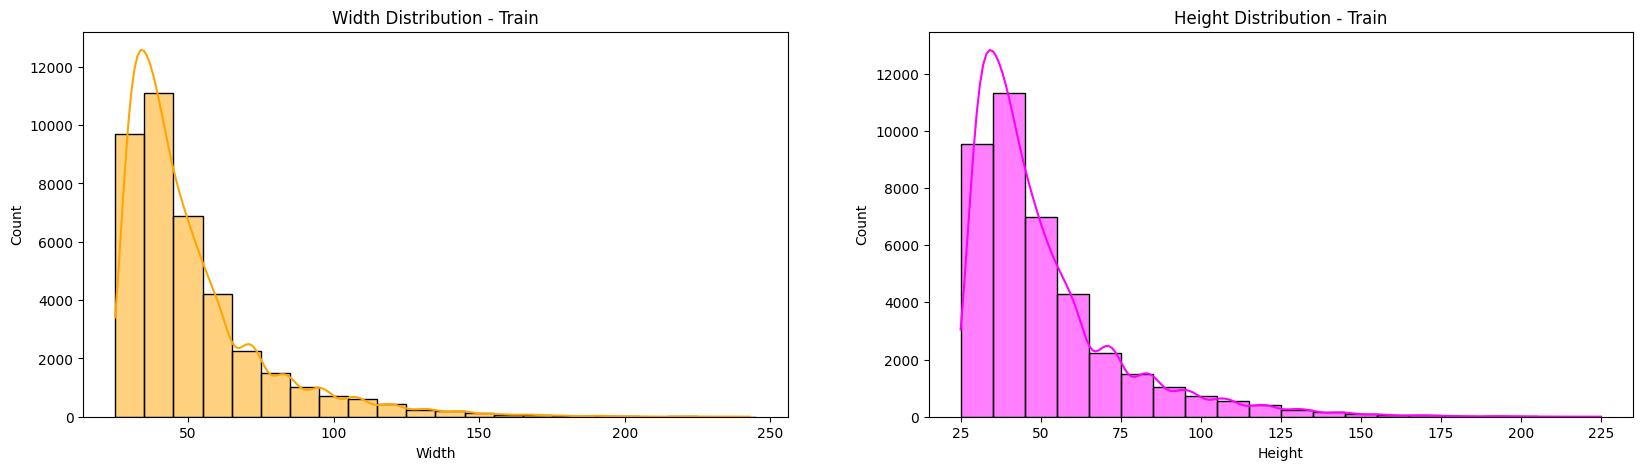

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,5))
sns.histplot(data = df_traincsv, x = df_traincsv['Width'],  binwidth = 10,  color = 'orange',  kde= True,ax = ax1)
sns.histplot(data = df_traincsv, x = df_traincsv['Height'],  binwidth = 10, color = 'magenta', kde= True, ax = ax2)
ax1.set_title('Width Distribution - Train')
ax2.set_title('Height Distribution - Train')

6. Read the csv info file in the test and concert it into df

In [14]:
test_csv = [test_path + '/' + f for f in os.listdir(test_path) if f.endswith('.csv')]
df_testcsv = pd.read_csv(test_csv[0], sep = ';')
print(df_testcsv.shape)
df_testcsv.head()

(12630, 7)


,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2
0,00000.ppm,53,54,6,5,48,49
1,00001.ppm,42,45,5,5,36,40
2,00002.ppm,48,52,6,6,43,47
3,00003.ppm,27,29,5,5,22,24
4,00004.ppm,60,57,5,5,55,52


7. Width and Height distribution of images in testset

Text(0.5, 1.0, 'Height Distribution - Test')

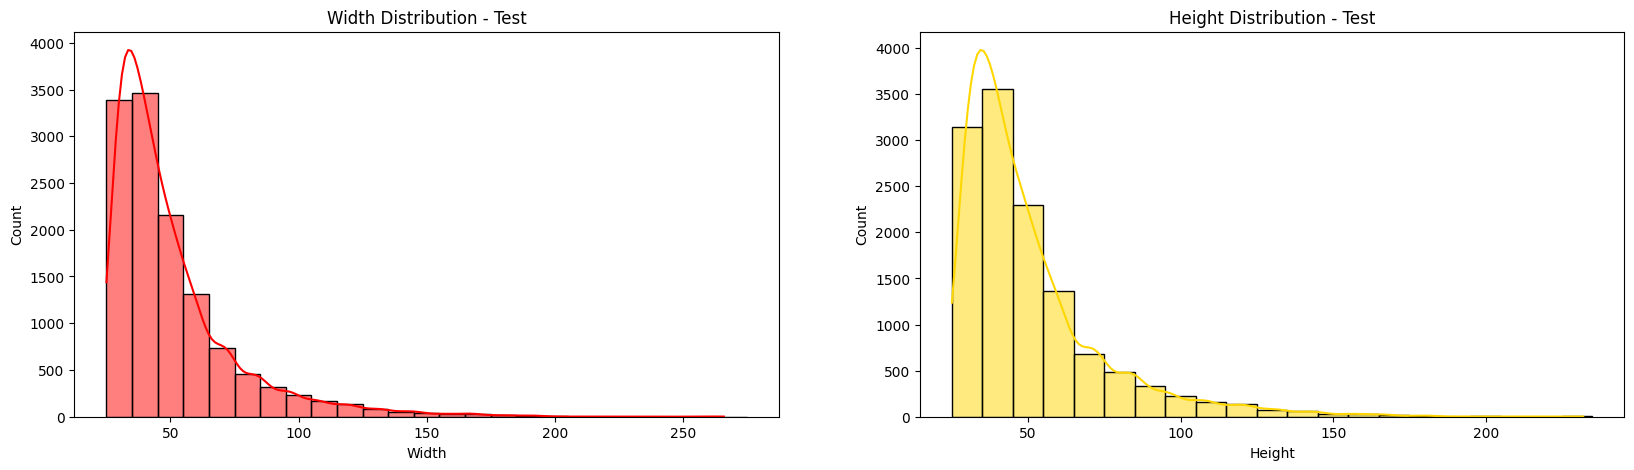

In [15]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,5))
sns.histplot(data = df_testcsv, x = df_testcsv['Width'],  binwidth = 10,  color = 'r',  kde= True,ax = ax1)
sns.histplot(data = df_testcsv, x = df_testcsv['Height'],  binwidth = 10, color = 'gold', kde= True, ax = ax2)
ax1.set_title('Width Distribution - Test')
ax2.set_title('Height Distribution - Test')

8. Display random images from the train set

In [16]:
# Common method to plot images based on flag
# flag = img -> img file is passed
# flag = np -> np array is passed
# tot_img = actual img required + 1
def plt_img(img_list,tot_img, flag = 'img'):
  plt.figure(figsize=(50,50))
  for i in range(1,tot_img):
    plt.subplot(5,5,i)
    if flag == 'img':
       #r_i = random.choice(img_list)
       r_img = imread(img_list[i-1])
       plt.imshow(r_img)
    elif flag == 'np':
        img = X_img[list_index[i-1]]
        plt.imshow(img , interpolation='nearest')  
    plt.grid()


In [17]:
train_img = [ train_path +'/' + f1 + '/' + f2 for f1 in os.listdir(train_path) 
            for f2 in os.listdir(train_path + '/' + f1) if f2.endswith('.ppm')]
train_img.sort()

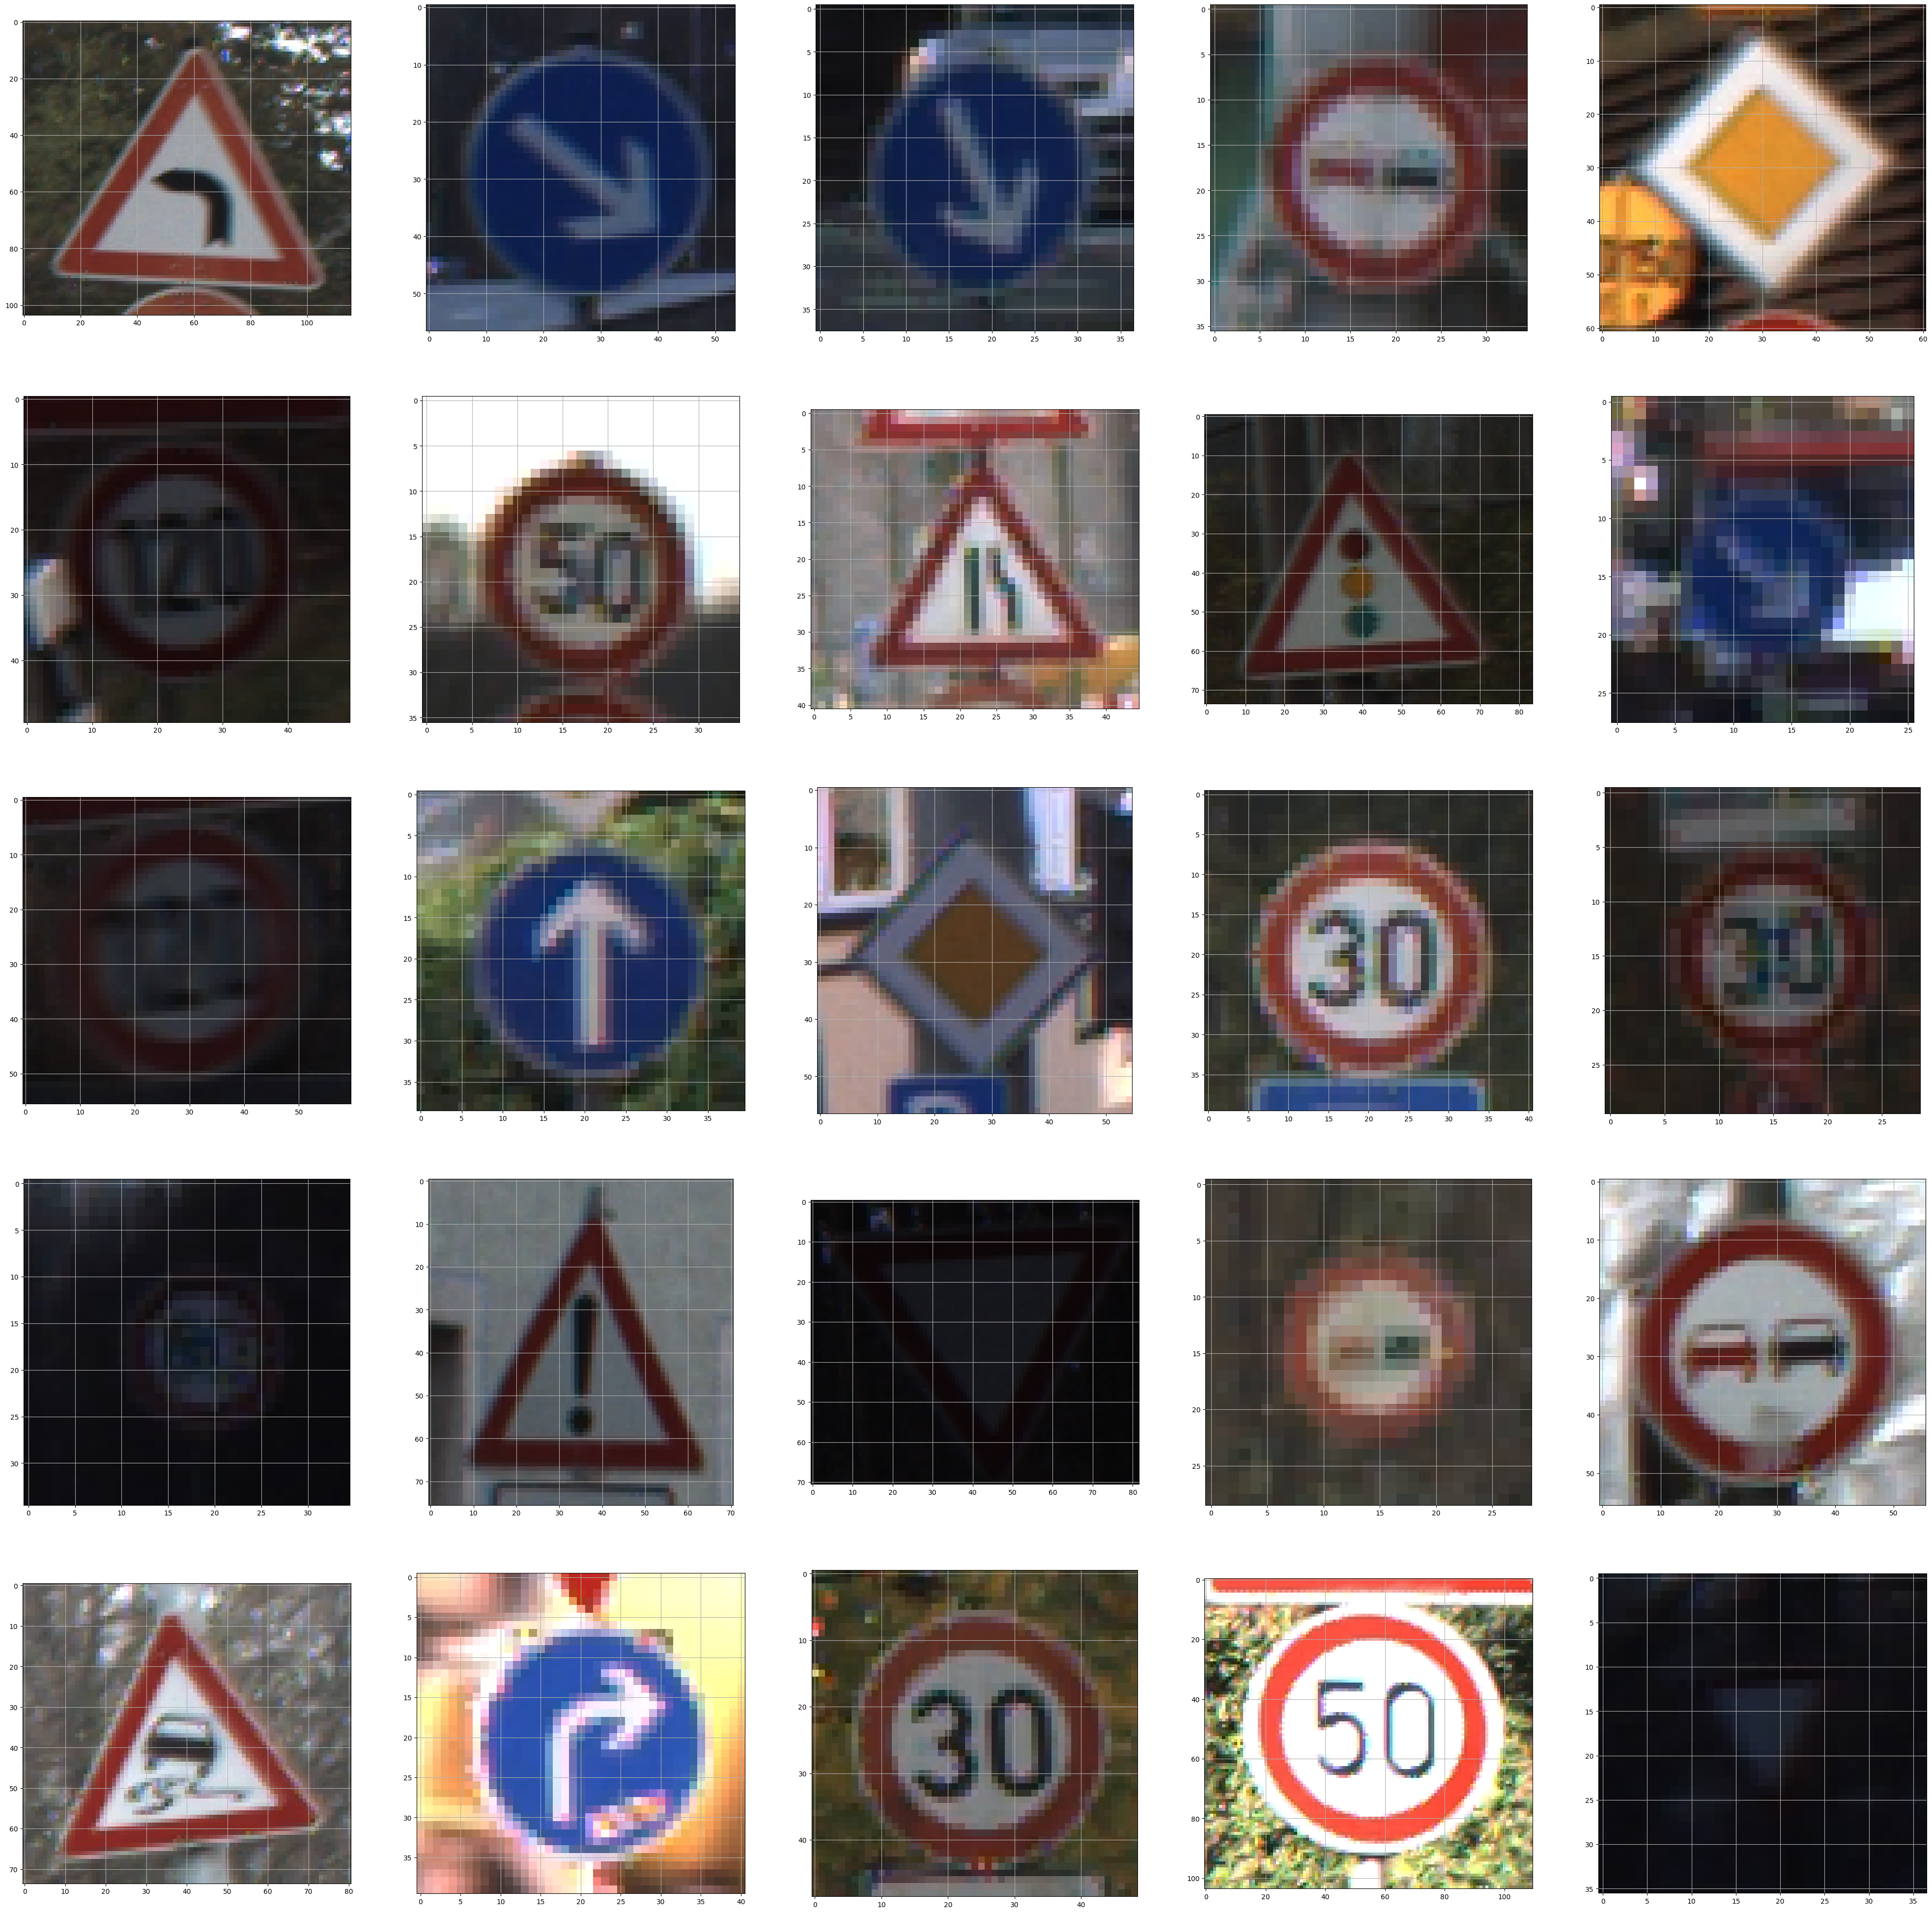

In [18]:
train_rimg = [random.choice(train_img) for i in range(0,25)]
plt_img(train_rimg,26)

9. Display random images from the test set

In [19]:
test_img = [ test_path +'/' + f1 for f1 in os.listdir(test_path) if f1.endswith('.ppm')]
test_img.sort()

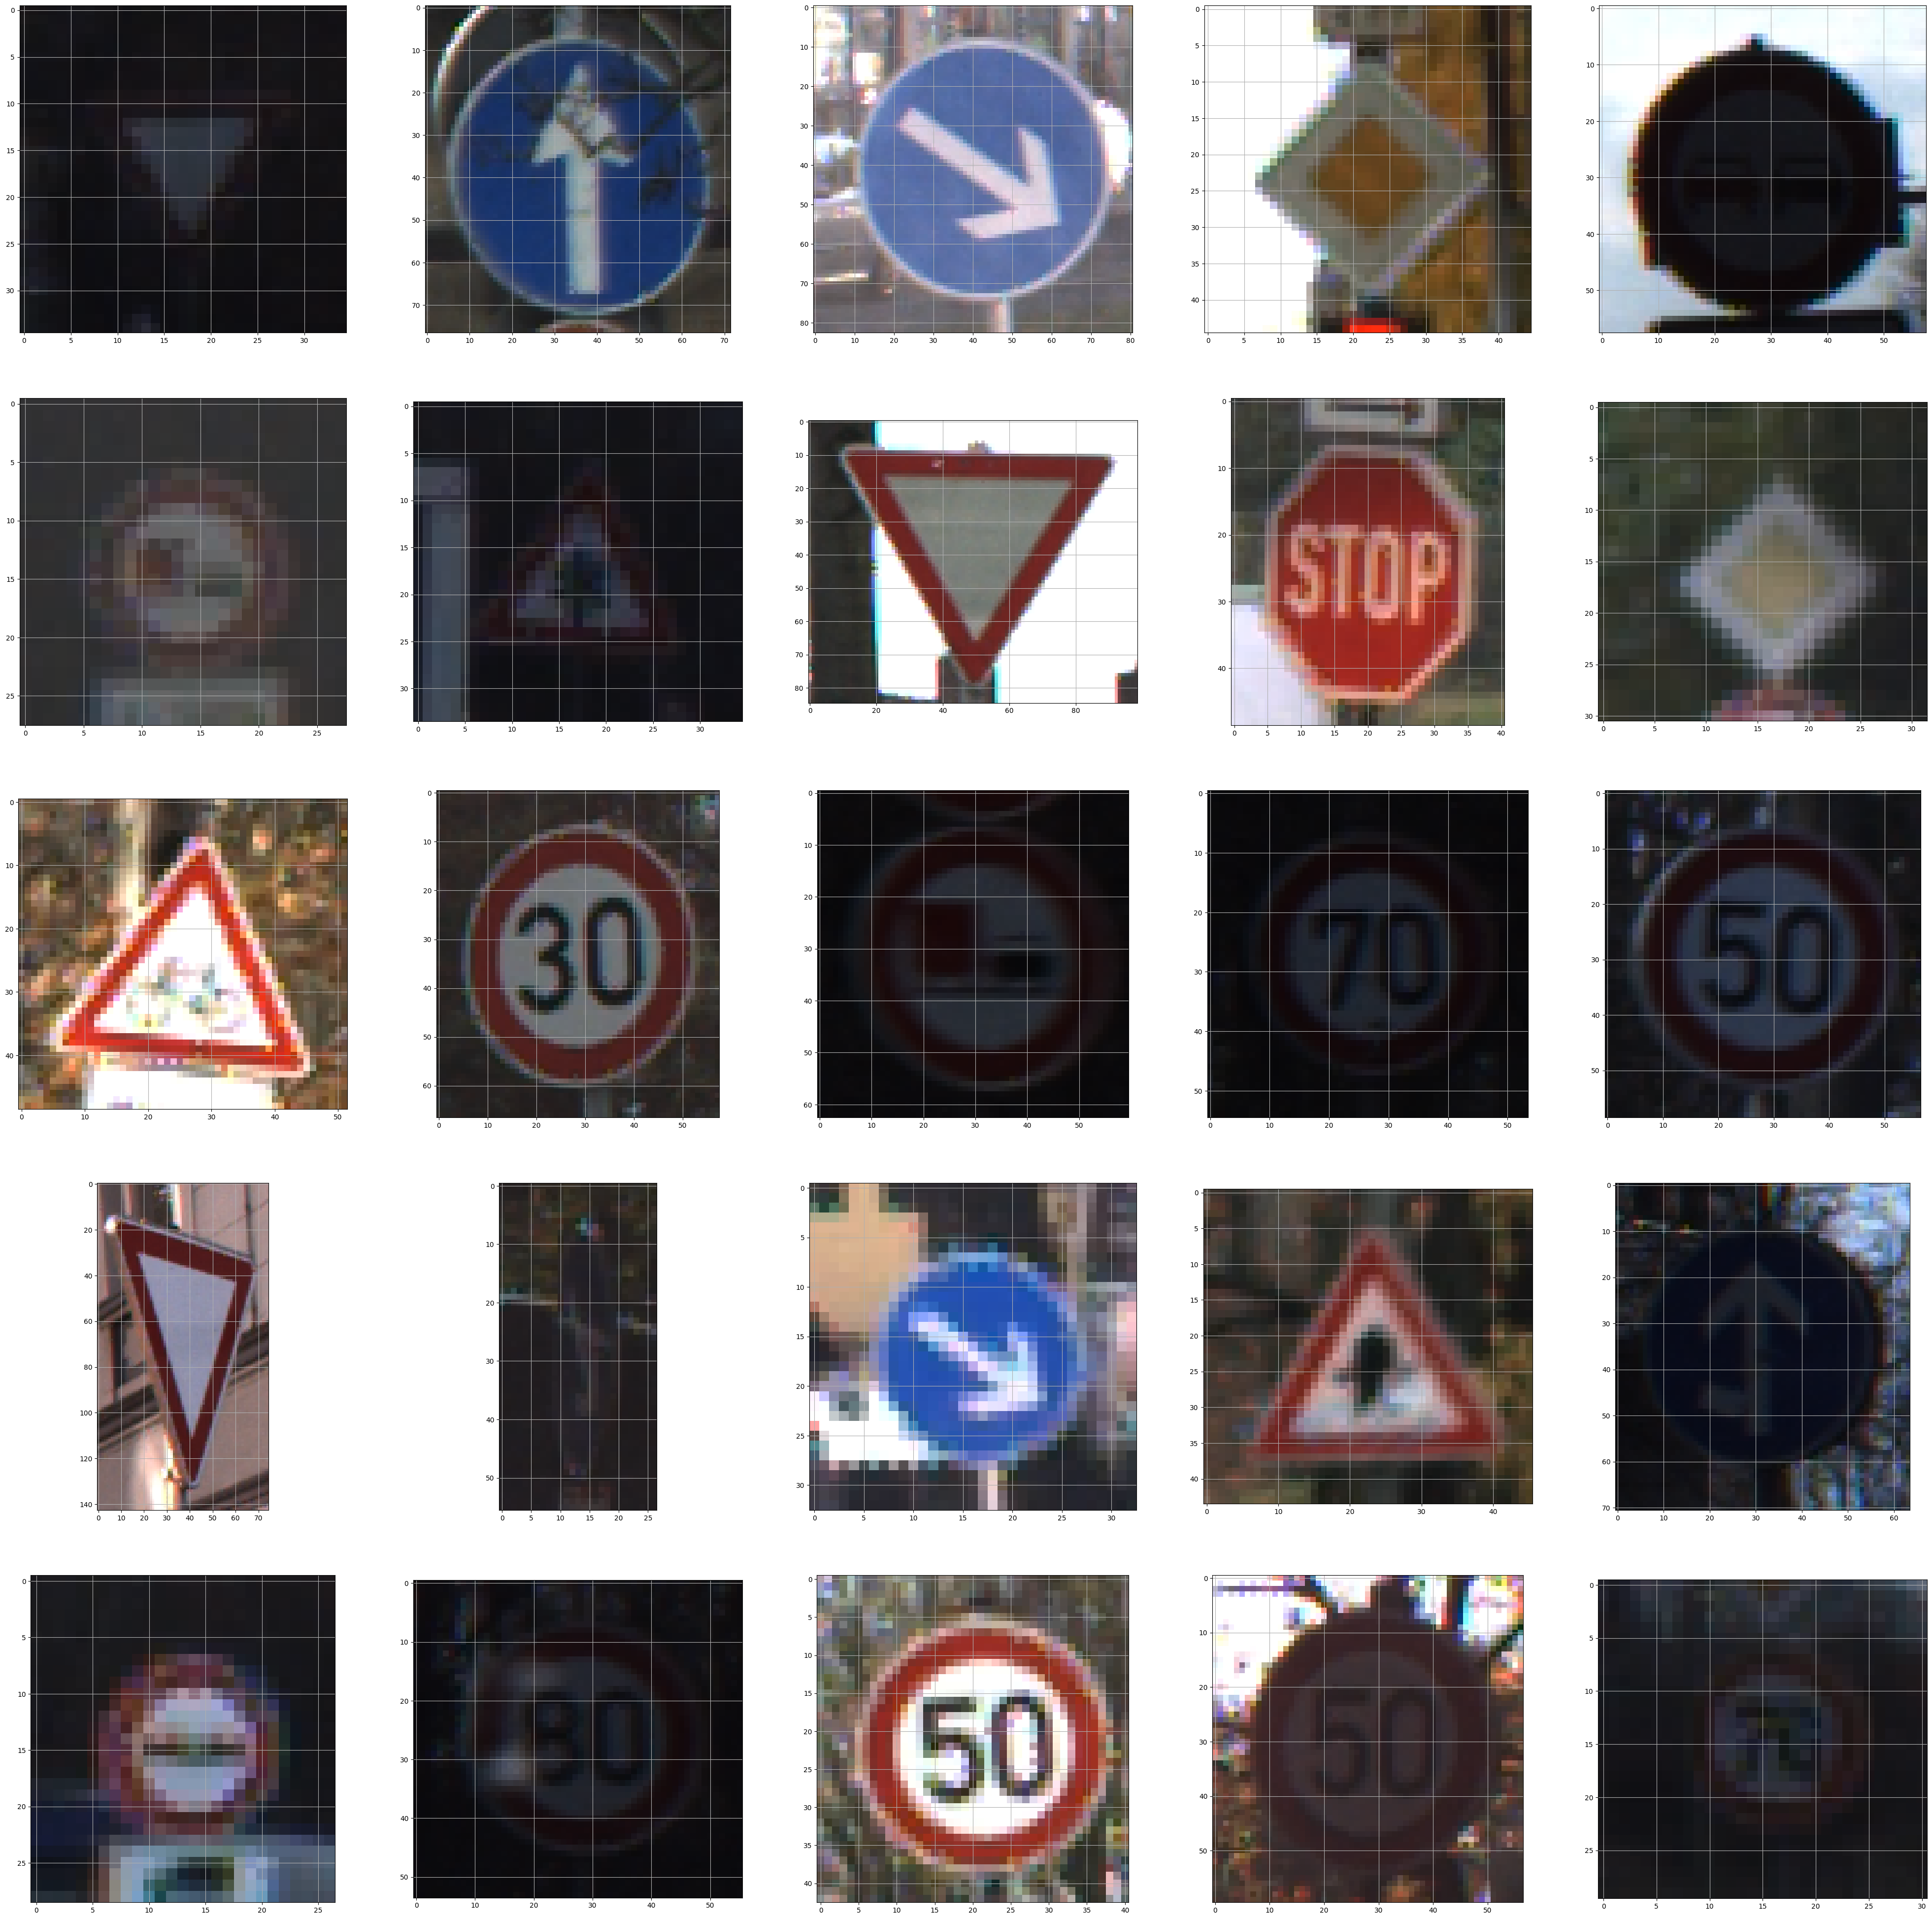

In [20]:
test_rimg = [random.choice(test_img) for i in range(0,25)]
plt_img(test_rimg,26)

**II - PREPROCESSING**

1. Resize images to a fixed size

In [21]:
img_width = 32
img_height = 32

# Common method to increases vaule channel and resizes training 
# image's to 32*32 that returns image as numpy array
def resize_img(img):
   value_img = color.rgb2hsv(img)
   value_img[:, :, 2] = exposure.equalize_hist(value_img[:, :, 2])
   img = color.hsv2rgb(value_img)

   #img = tf.image.adjust_brightness(img,0.2)

  #  min_side = min(img.shape[:-1])
  #  centre = img.shape[0] // 2, img.shape[1] // 2
  #  img = img[centre[0] - min_side // 2:centre[0] + min_side // 2,
  #             centre[1] - min_side // 2:centre[1] + min_side // 2,
  #             :]


   img = transform.resize(img, (img_width, img_height))
   return img



In [22]:
img_data = []
# Took around ~2m10s to execute
# Tf Brightness ~2m56s
for i in train_img:
  img = io.imread(i) # read the filepath as image
  img_arr = resize_img(img)# resized numpy array of each image
  img_data.append(img_arr)# main ndarray

X_img = np.array(img_data, dtype = 'float32') 

2. Display the original/resized + hsv value applied training images for comparison

Original Random Training Images


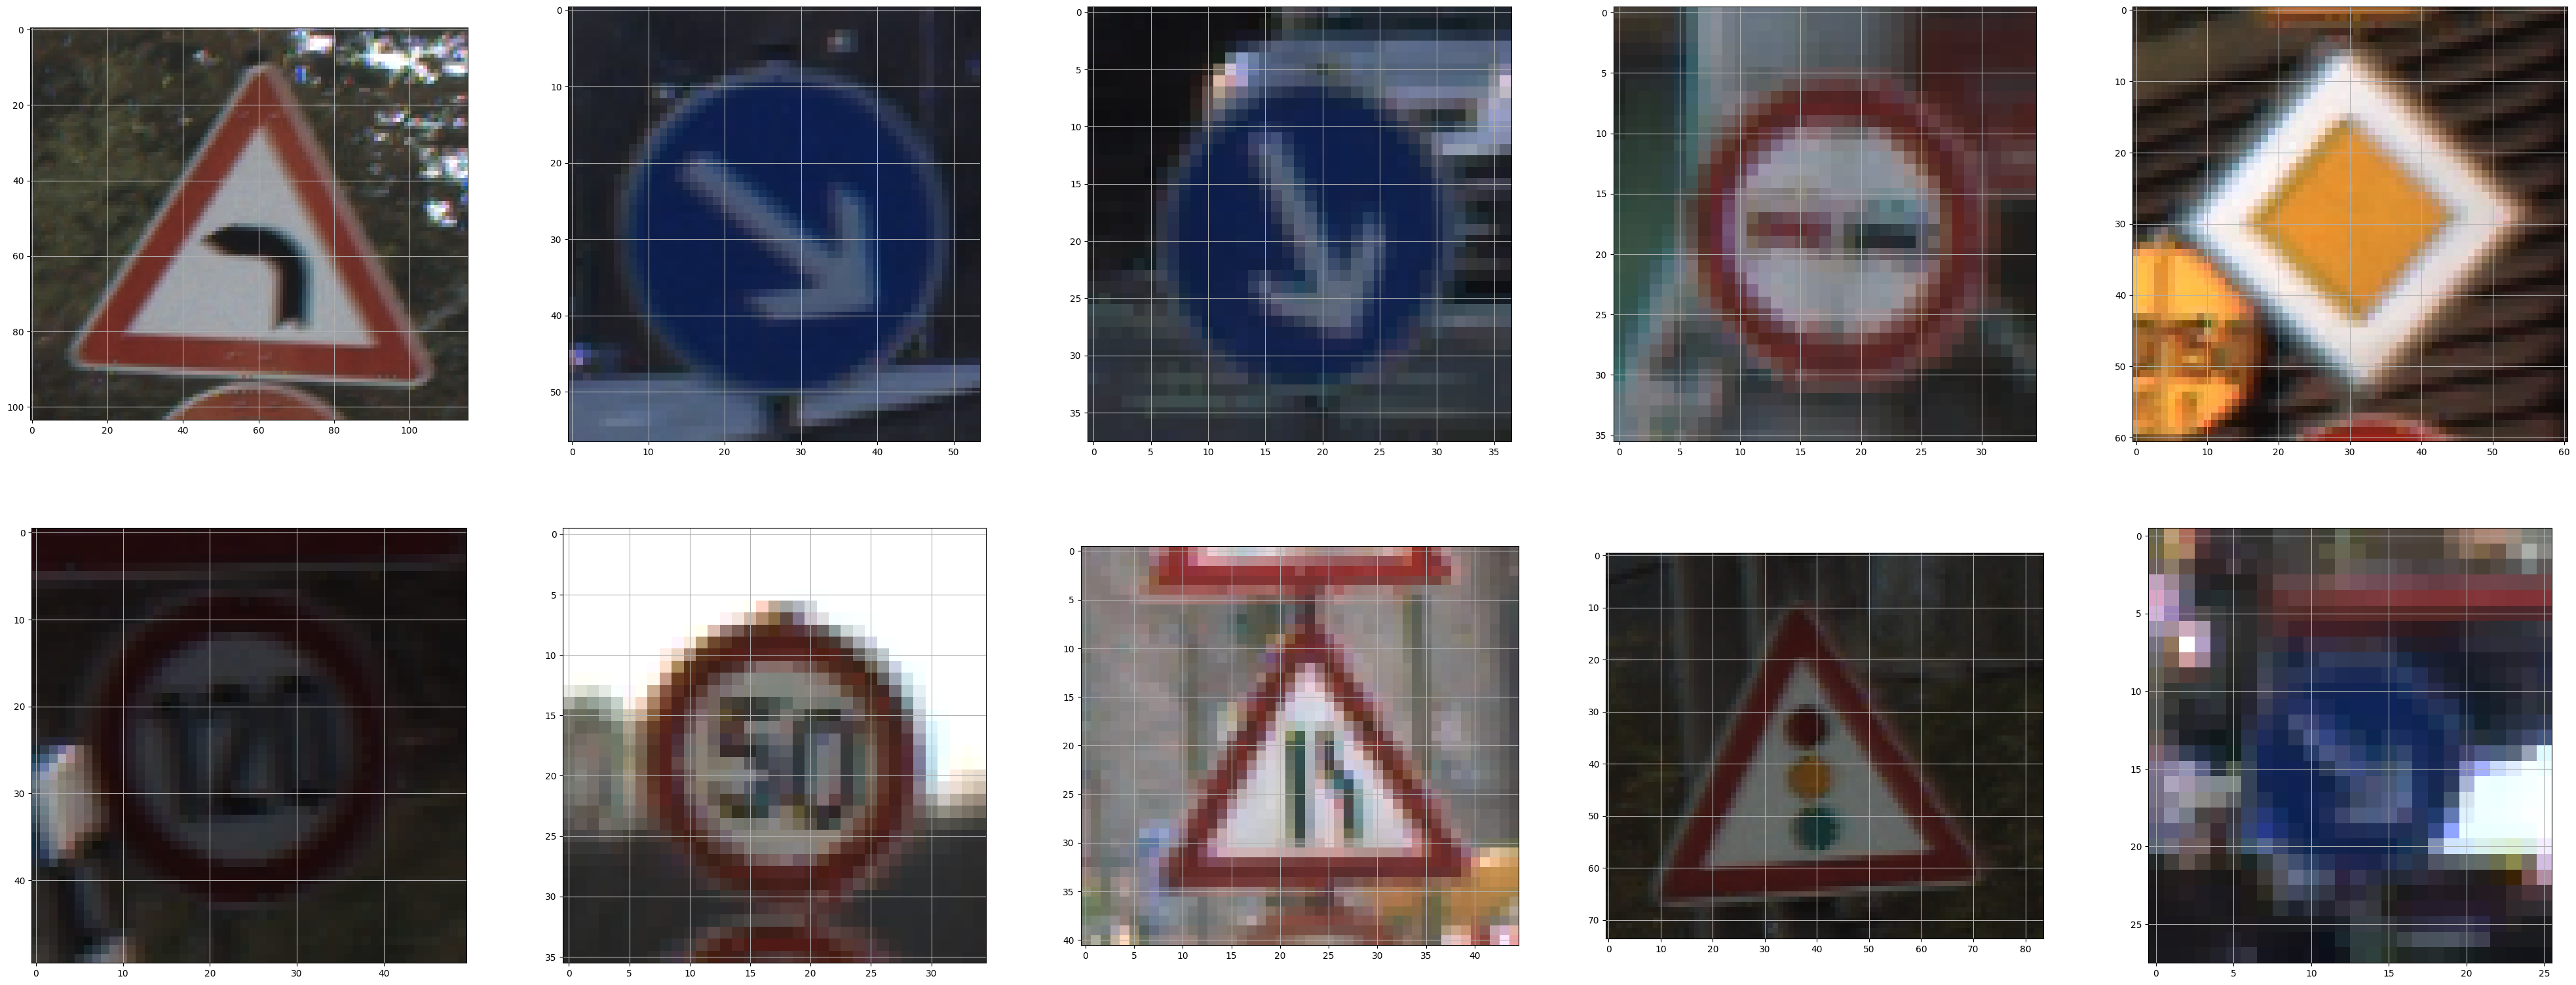

In [23]:
print('Original Random Training Images')
plt_img(train_rimg,11)

Modified Random Training Images


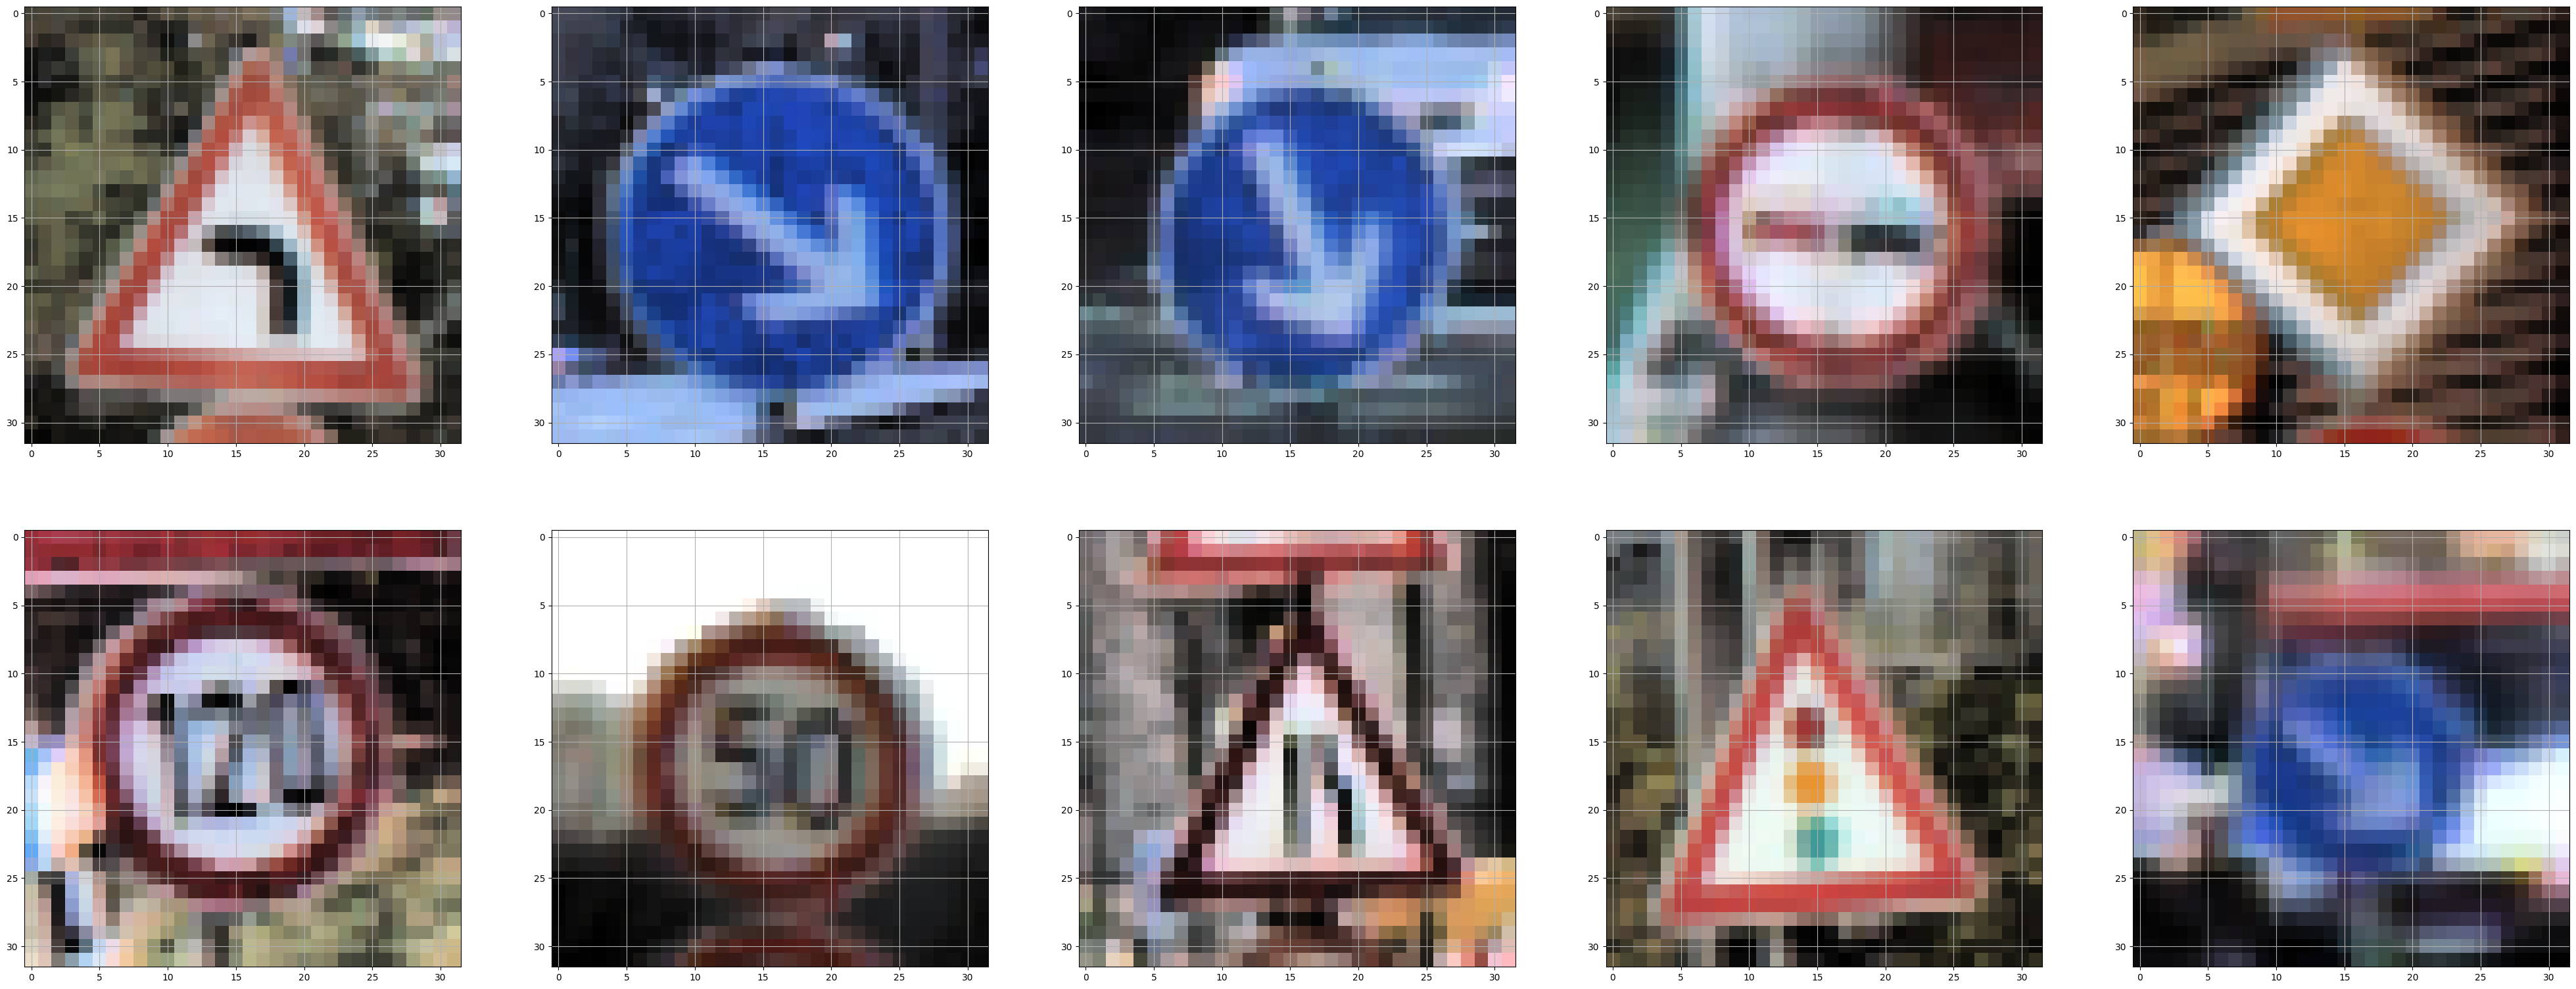

In [24]:
print('Modified Random Training Images')
list_index = [train_img.index(i) for i in train_rimg]
plt_img(None,11,'np')


In [25]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

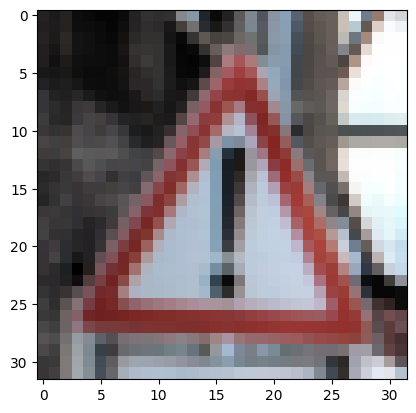

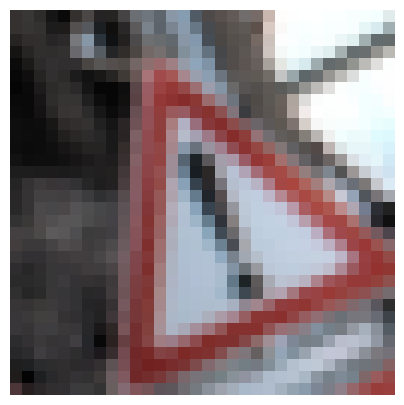

In [26]:
image = random.choice(X_img)
plt.imshow(image)
plt.figure(figsize=(5, 5))
for i in range(9):
  augmented_image = data_augmentation(image)
  #ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image)
  plt.axis("off")

In [30]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=15, horizontal_flip=True, vertical_flip=True)
num_images = 4000
file_path = os.listdir('/content/GTSRB/Final_Training/Images')
file_path.sort()
s_index = 0
e_index = 0
for class_id in df_traincsv['ClassId'].unique():
  class_images = df_traincsv[df_traincsv['ClassId']==class_id]
  num_to_generate = num_images - len(class_images)
  if num_to_generate > 0:
    e_index += len(class_images)
    images = X_img[s_index:e_index]
    s_index = e_index
    datagen.fit(images)
    i = 0
    out_dir = f'{train_path}/{file_path[class_id]}'
    i = 0
    for batch in datagen.flow(images, batch_size=1, save_to_dir=out_dir, save_prefix='aug_', save_format='ppm'):
      i += 1
      if i >= num_to_generate:
        break



In [40]:
train_folder = os.listdir(train_path)
# Dictionary which has {class_name : file in each class}
# Used to visualize the data
sign_data = {}

for f in train_folder:
  train_files = os.listdir(train_path + '/' + f)
  # Length - 1 so we dont consider the .csv file in each folder
  class_len = len(train_files) - 1
  class_name = str(f)
  sign_data.update({class_name : class_len})
  
# Convert the dict to df for further use
df_class = pd.DataFrame.from_dict(sign_data, orient = 'index', columns = ['Total Count'])
df_class = df_class.sort_index()

Class after Augmentation


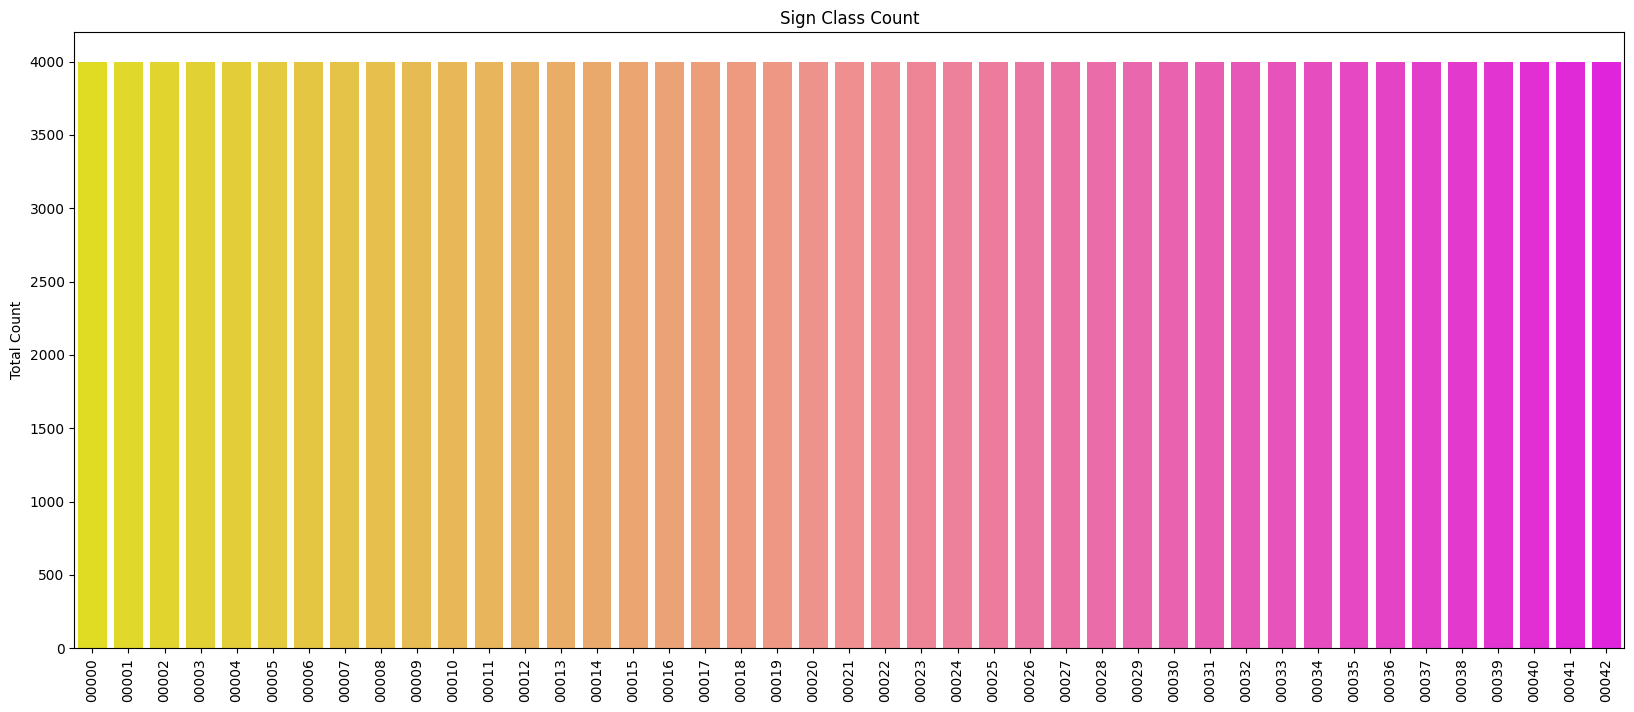

In [44]:
# Plot the class sign vs total count in each classes
fig,ax = plt.subplots(figsize=(20,8))
sns.barplot(data = df_class , x = df_class.index, y = df_class['Total Count'], ax = ax, palette = 'spring_r')
ax.tick_params(axis='x', rotation=90)
ax.set_title('Sign Class Count')
print('Class after Augmentation')

In [45]:
train_img = [ train_path +'/' + f1 + '/' + f2 for f1 in os.listdir(train_path) 
            for f2 in os.listdir(train_path + '/' + f1) if f2.endswith('.ppm')]
train_img.sort()